# Introduction

In [1]:
import numpy as np
import pandas as pd


import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
#import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Data Import

This section involves importing the data into the code and reading it as pandas dataframe.

### Read the data

Training data from a different file or location can be read by __changing the argument value__ of the `pd.read_csv()` function with the path to the file.

In [2]:
train_data=pd.read_csv('CreditCard_train.csv')

In [3]:
train_data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [4]:
train_data.rename(columns=(train_data.iloc[0]),inplace=True)
train_data.drop(index=[0],inplace=True)
train_data.rename(columns={'default payment next month':'Y'},inplace=True)

In [5]:
train_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
train_data.dtypes

ID           object
LIMIT_BAL    object
SEX          object
EDUCATION    object
MARRIAGE     object
AGE          object
PAY_0        object
PAY_2        object
PAY_3        object
PAY_4        object
PAY_5        object
PAY_6        object
BILL_AMT1    object
BILL_AMT2    object
BILL_AMT3    object
BILL_AMT4    object
BILL_AMT5    object
BILL_AMT6    object
PAY_AMT1     object
PAY_AMT2     object
PAY_AMT3     object
PAY_AMT4     object
PAY_AMT5     object
PAY_AMT6     object
Y            object
dtype: object

In [7]:
train_data=train_data.astype(int)

# Data Transformation and Exploration

### Analysing the data 

First the number unique entries in each column was verified to identify the categorical variables and cross-check if they have the same number of categories as in the documentation.

In [8]:
train_data.nunique()

ID           24000
LIMIT_BAL       79
SEX              2
EDUCATION        7
MARRIAGE         4
AGE             55
PAY_0           11
PAY_2           11
PAY_3           11
PAY_4           11
PAY_5           10
PAY_6           10
BILL_AMT1    18717
BILL_AMT2    18367
BILL_AMT3    18132
BILL_AMT4    17720
BILL_AMT5    17284
BILL_AMT6    16906
PAY_AMT1      6918
PAY_AMT2      6839
PAY_AMT3      6424
PAY_AMT4      6028
PAY_AMT5      5984
PAY_AMT6      5988
Y                2
dtype: int64

#### ID

ID has been set as index since this feature does not determine the outcome Y.

In [9]:
train_data.set_index('ID',inplace=True)

#### LIMIT_BAL

`LIMIT_BAL` is not categorical variable hence we will analyse the distribution.

In [10]:
print('Minimum is: %d'%train_data['LIMIT_BAL'].min())
print('Maximum is: %d'%train_data['LIMIT_BAL'].max())

Minimum is: 10000
Maximum is: 1000000


Using the histogram we are going to see how many entries fall under each class. Number of bins chosen is __30__ so the class size is __33000 NT dollar__.

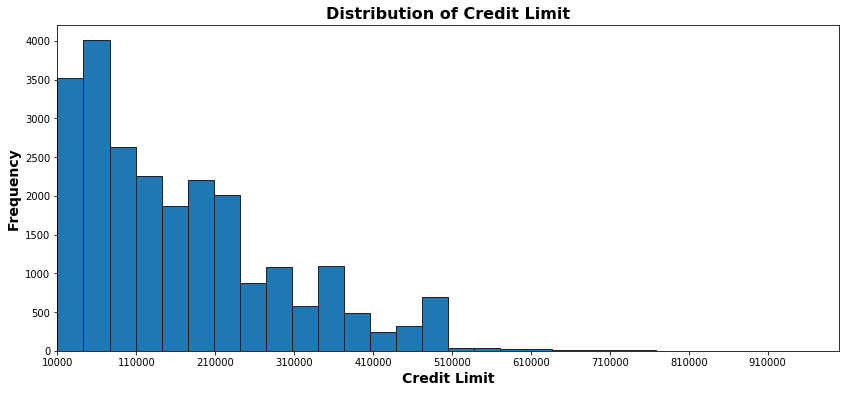

In [11]:
plt.figure(figsize = (14,6))
plt.xlim((10000,1000000))
plt.xticks(np.arange(10000,1000000,100000))
plt.hist(train_data['LIMIT_BAL'],range=[10000,1000000],bins=30,edgecolor='#242124')
plt.title('Distribution of Credit Limit',fontsize=16,fontweight='bold')
plt.xlabel('Credit Limit',fontsize=14,fontweight='bold')
plt.ylabel('Frequency',fontsize=14,fontweight='bold')
plt.show()

Group this??? 

#### SEX

`SEX` takes __two__ values from __[1, 2]__ .

In [12]:
ct1=pd.crosstab(train_data['SEX'], train_data['Y'])
ct1

Y,0,1
SEX,,
1,6735,2187
2,11895,3183


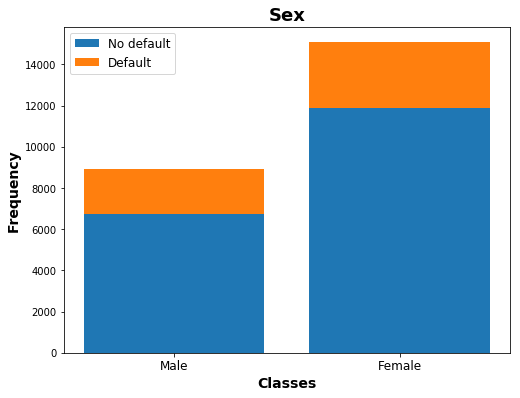

In [13]:
plt.figure(figsize = (8,6))
index=np.arange(2)
b1=plt.bar(index,list(ct1[0]),label='No default')
b2=plt.bar(index,list(ct1[1]),bottom=list(ct1[0]),label='Default')
plt.xticks(index,labels=['Male','Female'],fontsize=12)
plt.title('Sex',fontsize=18,fontweight='bold')
plt.xlabel('Classes',fontsize=14,fontweight='bold')
plt.ylabel('Frequency',fontsize=14,fontweight='bold')
plt.legend(fontsize=12)
plt.show()

#### EDUCATION

`EDUCATION` is supposed to take the values from __[ 1 , 2 , 3 , 4 ]__ but from line [9]e we know it takes __seven__ unique values.

In [14]:
pd.DataFrame(train_data['EDUCATION'].value_counts().sort_index())

,EDUCATION
0,11
1,8443
2,11360
3,3850
4,92
5,207
6,37


0, 5 and 6 are undocumented. However since the meaning of these labels are unknown it makes sense to replace the values by class 4 which means others.

In [15]:
train_data['EDUCATION'].loc[(train_data['EDUCATION']==0)|(train_data['EDUCATION']==5)|(train_data['EDUCATION']==6)]=4

In [16]:
ct2=pd.crosstab(train_data['EDUCATION'], train_data['Y'])
ct2

Y,0,1
EDUCATION,,
1,6791,1652
2,8645,2715
3,2869,981
4,325,22


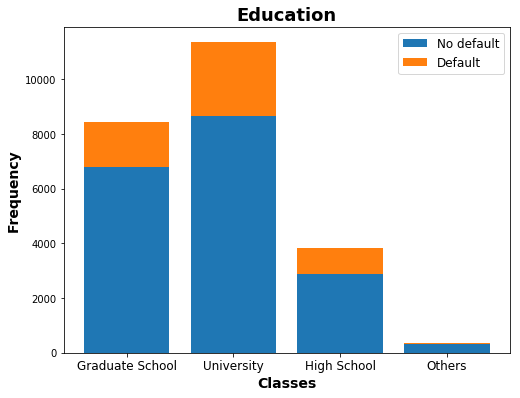

In [17]:
plt.figure(figsize = (8,6))
index=np.arange(4)
b1=plt.bar(index,list(ct2[0]),label='No default')
b2=plt.bar(index,list(ct2[1]),bottom=list(ct2[0]),label='Default')
plt.xticks(index,labels=['Graduate School','University','High School','Others'],fontsize=12)
plt.title('Education',fontsize=18,fontweight='bold')
plt.xlabel('Classes',fontsize=14,fontweight='bold')
plt.ylabel('Frequency',fontsize=14,fontweight='bold')
plt.legend(fontsize=12)
plt.show()

#### MARRIAGE

`MARRIAGE` is supposed to take the values from __[ 1 , 2 , 3 ]__ but from line [9] we know it takes __four__ unique values.

In [18]:
pd.DataFrame(train_data['MARRIAGE'].value_counts().sort_index())

,MARRIAGE
0,41
1,10813
2,12877
3,269


0 is undocumented. However since the meaning of these labels are unknown it makes sense to replace the values by class 3 which means others.

In [19]:
train_data['MARRIAGE'].loc[(train_data['MARRIAGE']==0)]=3

In [20]:
ct3=pd.crosstab(train_data['MARRIAGE'], train_data['Y'])
ct3

Y,0,1
MARRIAGE,,
1,8236,2577
2,10156,2721
3,238,72


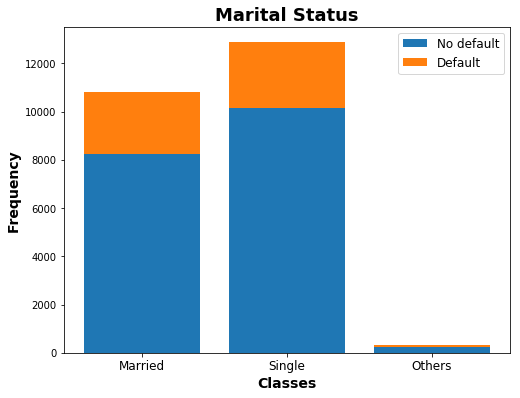

In [21]:
plt.figure(figsize = (8,6))
index=np.arange(3)
b1=plt.bar(index,list(ct3[0]),label='No default')
b2=plt.bar(index,list(ct3[1]),bottom=list(ct3[0]),label='Default')
plt.xticks(index,labels=['Married','Single','Others'],fontsize=12)
plt.title('Marital Status',fontsize=18,fontweight='bold')
plt.xlabel('Classes',fontsize=14,fontweight='bold')
plt.ylabel('Frequency',fontsize=14,fontweight='bold')
plt.legend(fontsize=12)
plt.show()

#### AGE

`AGE` is not categorical variable hence we will analyse the distribution.

In [22]:
print('Minimum is: %d'%train_data['AGE'].min())
print('Maximum is: %d'%train_data['AGE'].max())

Minimum is: 21
Maximum is: 79


Using the histogram we are going to see how many entries fall under each class. Number of bins chosen is __58__ so the class size is __1 year__.

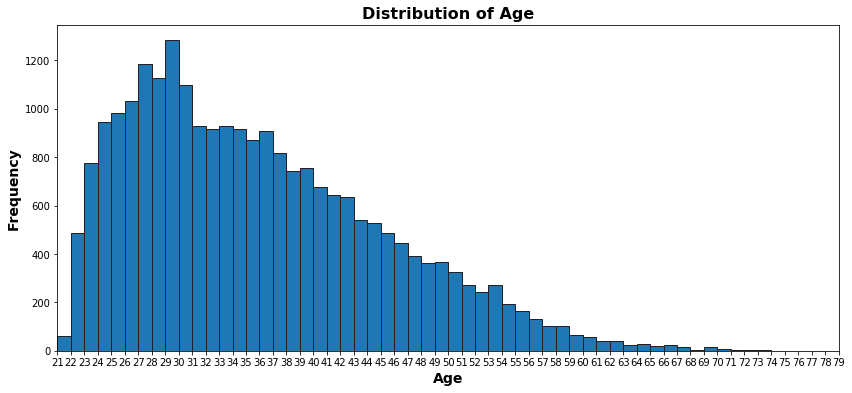

In [23]:
plt.figure(figsize = (14,6))
plt.xlim((21,79))
plt.xticks(np.arange(21,80))
plt.hist(train_data['AGE'],range=[21,79],bins=58,edgecolor='#242124')
plt.title('Distribution of Age',fontsize=16,fontweight='bold')
plt.xlabel('Age',fontsize=14,fontweight='bold')
plt.ylabel('Frequency',fontsize=14,fontweight='bold')
plt.show()

Group this??? 

#### PAY_x

`PAY_x` columns are supposed to take the values __-1__ and  __0 to 9__ but from line [9] we know except PAY_5 and PAY_6 all other columns take __eleven__ unique values.

In [24]:
d=pd.DataFrame(train_data['PAY_0'].value_counts().sort_index())
d['PAY_2']=pd.DataFrame(train_data['PAY_2'].value_counts().sort_index())
d['PAY_3']=pd.DataFrame(train_data['PAY_3'].value_counts().sort_index())
d['PAY_4']=pd.DataFrame(train_data['PAY_4'].value_counts().sort_index())
d['PAY_5']=pd.DataFrame(train_data['PAY_5'].value_counts().sort_index())
d['PAY_6']=pd.DataFrame(train_data['PAY_6'].value_counts().sort_index())
d

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
-2,2086,2953,3197,3382,3539.0,3818.0
-1,4625,4887,4787,4555,4483.0,4722.0
0,11739,12543,12577,13251,13520.0,12877.0
1,2994,20,4,2,NaN,NaN
2,2185,3204,3121,2515,2178.0,2324.0
3,254,268,183,158,147.0,158.0
4,66,76,64,55,71.0,37.0
5,17,21,17,29,11.0,9.0
6,9,9,21,5,3.0,16.0
7,7,18,27,46,47.0,37.0


-2 and 0 are undocumented in all these columns.

According to the document pay duly is represented by -1. However going by the trend of the other values pay dulyu should be represented by 0 since pay duly means there was a payment delay of 0 months. Going by this asssumption, all the stray values less than 0 can be replaced by zero as they all must mean they were paid duly on/before the due date.

In [25]:
train_data['PAY_0'].loc[(train_data['PAY_0']==-1)|(train_data['PAY_0']==-2)]=0
train_data['PAY_2'].loc[(train_data['PAY_2']==-1)|(train_data['PAY_2']==-2)]=0
train_data['PAY_3'].loc[(train_data['PAY_3']==-1)|(train_data['PAY_3']==-2)]=0
train_data['PAY_4'].loc[(train_data['PAY_4']==-1)|(train_data['PAY_4']==-2)]=0
train_data['PAY_5'].loc[(train_data['PAY_5']==-1)|(train_data['PAY_5']==-2)]=0
train_data['PAY_6'].loc[(train_data['PAY_6']==-1)|(train_data['PAY_6']==-2)]=0

Also, the name PAY_0 seems inconsistent in comparison to all the other columns named PAY_AMTx and BILL_AMTx. Also, assuming that the number suffixed refers to the difference of current month with the month considered by the variable in number of months, PAY_0 can be renamed to PAY_1.

In [26]:
train_data.rename(columns={'PAY_0':'PAY_1'},inplace=True)

In [27]:
ct4=pd.crosstab(train_data['PAY_1'], train_data['Y'])
ct5=pd.crosstab(train_data['PAY_2'], train_data['Y'])
ct6=pd.crosstab(train_data['PAY_3'], train_data['Y'])
ct7=pd.crosstab(train_data['PAY_4'], train_data['Y'])
ct8=pd.crosstab(train_data['PAY_5'], train_data['Y'])
ct9=pd.crosstab(train_data['PAY_6'], train_data['Y'])

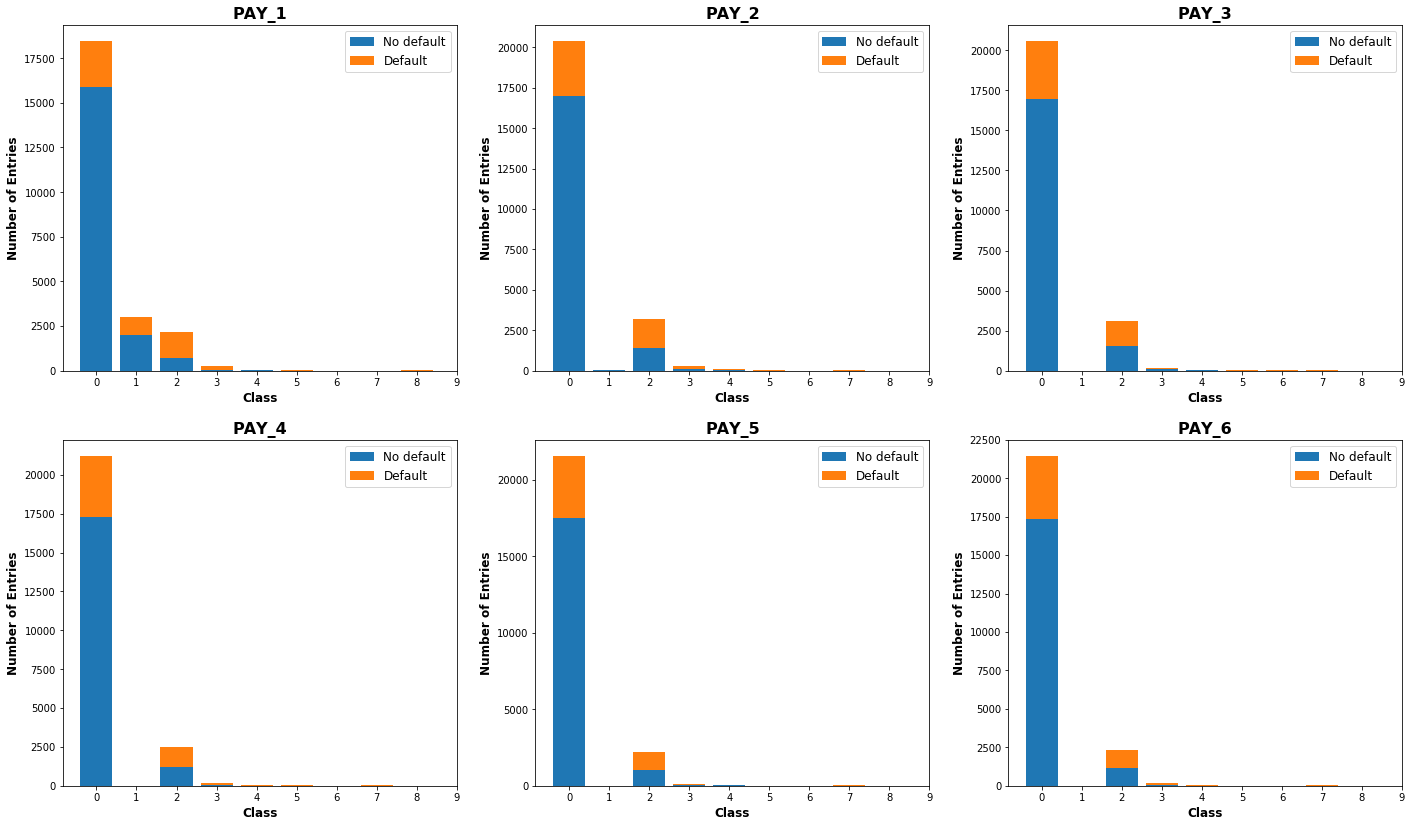

In [28]:
fig,axs=plt.subplots(2,3,figsize=(24,14))

axs[0][0].bar(list(ct4.index),ct4[0],label='No default')
axs[0][0].bar(list(ct4.index),ct4[1],bottom=ct4[0],label='Default')
axs[0][0].legend(fontsize=12)
axs[0][0].set_xticks(np.arange(0,10))
axs[0][0].set_title('PAY_1',fontsize='16',fontweight='bold')
axs[0][0].set_xlabel('Class',fontsize='12',fontweight='bold')
axs[0][0].set_ylabel('Number of Entries',fontsize='12',fontweight='bold')

axs[0][1].bar(list(ct5.index),ct5[0],label='No default')
axs[0][1].bar(list(ct5.index),ct5[1],bottom=ct5[0],label='Default')
axs[0][1].legend(fontsize=12)
axs[0][1].set_xticks(np.arange(0,10))
axs[0][1].set_title('PAY_2',fontsize='16',fontweight='bold')
axs[0][1].set_xlabel('Class',fontsize='12',fontweight='bold')
axs[0][1].set_ylabel('Number of Entries',fontsize='12',fontweight='bold')

axs[0][2].bar(list(ct6.index),ct6[0],label='No default')
axs[0][2].bar(list(ct6.index),ct6[1],bottom=ct6[0],label='Default')
axs[0][2].legend(fontsize=12)
axs[0][2].set_xticks(np.arange(0,10))
axs[0][2].set_title('PAY_3',fontsize='16',fontweight='bold')
axs[0][2].set_xlabel('Class',fontsize='12',fontweight='bold')
axs[0][2].set_ylabel('Number of Entries',fontsize='12',fontweight='bold')

axs[1][0].bar(list(ct7.index),ct7[0],label='No default')
axs[1][0].bar(list(ct7.index),ct7[1],bottom=ct7[0],label='Default')
axs[1][0].legend(fontsize=12)
axs[1][0].set_xticks(np.arange(0,10))
axs[1][0].set_title('PAY_4',fontsize='16',fontweight='bold')
axs[1][0].set_xlabel('Class',fontsize='12',fontweight='bold')
axs[1][0].set_ylabel('Number of Entries',fontsize='12',fontweight='bold')

axs[1][1].bar(list(ct8.index),ct8[0],label='No default')
axs[1][1].bar(list(ct8.index),ct8[1],bottom=ct8[0],label='Default')
axs[1][1].legend(fontsize=12)
axs[1][1].set_xticks(np.arange(0,10))
axs[1][1].set_title('PAY_5',fontsize='16',fontweight='bold')
axs[1][1].set_xlabel('Class',fontsize='12',fontweight='bold')
axs[1][1].set_ylabel('Number of Entries',fontsize='12',fontweight='bold')

axs[1][2].bar(list(ct9.index),ct9[0],label='No default')
axs[1][2].bar(list(ct9.index),ct9[1],bottom=ct9[0],label='Default')
axs[1][2].legend(fontsize=12)
axs[1][2].set_xticks(np.arange(0,10))
axs[1][2].set_title('PAY_6',fontsize='16',fontweight='bold')
axs[1][2].set_xlabel('Class',fontsize='12',fontweight='bold')
axs[1][2].set_ylabel('Number of Entries',fontsize='12',fontweight='bold')

plt.show()

#### BILL_AMTx

`BILL_AMTx` is not categorical variable hence we will analyse by describing these columns.

In [29]:
train_data[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,24000.000000,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000
mean,50596.884708,48646.064125,4.636706e+04,42368.188417,40000.682542,38563.710625
std,72649.374256,70364.600436,6.819390e+04,63070.680934,60345.012766,59155.759799
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3631.500000,3098.500000,2.773500e+03,2340.000000,1740.000000,1234.750000
50%,22330.000000,21339.000000,2.003900e+04,18940.500000,18107.500000,17036.000000
75%,65779.500000,62761.250000,5.929800e+04,52188.500000,49746.500000,48796.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


___Observations:___
- There are no missing values (verified by count = 24,000).
- There are negative values which may be due to the client overpaying the previous bill therefore leading to credit.
- The negative values are less than 25% (exactly 1.88%) of the total dataset. 

#### PAY_AMTx

`PAY_AMTx` is not categorical variable hence we will analyse by describing these columns.

In [30]:
train_data[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,24000.000000,2.400000e+04,24000.00000,24000.000000,24000.000000,24000.000000
mean,5542.912917,5.815336e+03,4969.26600,4743.480042,4783.486042,5189.399042
std,15068.576072,2.079703e+04,16095.61434,14883.269990,15270.405279,17630.371990
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.000000e+02,379.00000,279.750000,244.000000,60.750000
50%,2100.000000,2.000000e+03,1702.50000,1500.000000,1500.000000,1500.000000
75%,5000.000000,5.000000e+03,4347.25000,4000.000000,4005.000000,4000.000000
max,505000.000000,1.684259e+06,896040.00000,497000.000000,417990.000000,528666.000000


___Observations:___
- There are no missing values (verified by count = 24,000).
- Minimum value is 0 which is as expected. 

### Grouping Age into Age bins

Grouping age into age bins and converting age as a categorical variable can potentially give more insight than the age as such.

In [31]:
def age_conditions(df):
    if(df['AGE']<=24):
        return 0 #junior
    elif(df['AGE']<=40):
        return 1 #adult
    elif(df['AGE']<=55):
        return 2 #middle-aged
    else:
        return 3 #senior

In [32]:
train_data['AGE_BINS'] = train_data.apply(age_conditions, axis=1)

In [33]:
train_data=train_data[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE' ,'AGE_BINS', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Y']]

### Checking the balance of the dataset

Firstly, we have to check for imbalance in data, i.e. if the difference between the number of samples for each category is really high then the dataset is imbalanced. This will affect in training the model. 

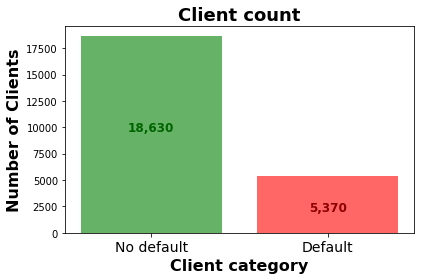

In [34]:
count_val=train_data['Y'].value_counts()

#Visualising the count
X_ticks=['No default','Default']
bar_width=0.7
fig,ax=plt.subplots()
plt.bar(1,count_val[0],color='g', alpha=0.6)
plt.bar(2,count_val[1],color='r', alpha=0.6)
plt.text(1, count_val[0]/2, "{:,}".format(count_val[0]),color='darkgreen', ha='center', va= 'bottom',fontweight='bold',fontsize=12)
plt.text(2, count_val[1]/3, "{:,}".format(count_val[1]), color='darkred',ha='center', va= 'bottom',fontweight='bold',fontsize=12)
ax.set_title('Client count',fontsize=18,fontweight='bold')
ax.set_xlabel('Client category',fontsize=16,fontweight='bold')
ax.set_ylabel('Number of Clients',fontsize=16,fontweight='bold')
ax.set_xticks([1,2])
ax.set_xticklabels(X_ticks,fontsize=14)
fig.tight_layout()
plt.show()

From the above observation it can be seen that the training data is not balanced. The number of samples there is higher number of samples for 'No default' class is much higher than that for 'Default' class.
Therefore, undersampling or oversampling is required. 
Undersampling can cause loss of features. Hence, oversampling will be considered in the 

### Calculate the correlation between the features

In [35]:
correlation = train_data.corr()
corr_array  = np.array(correlation)

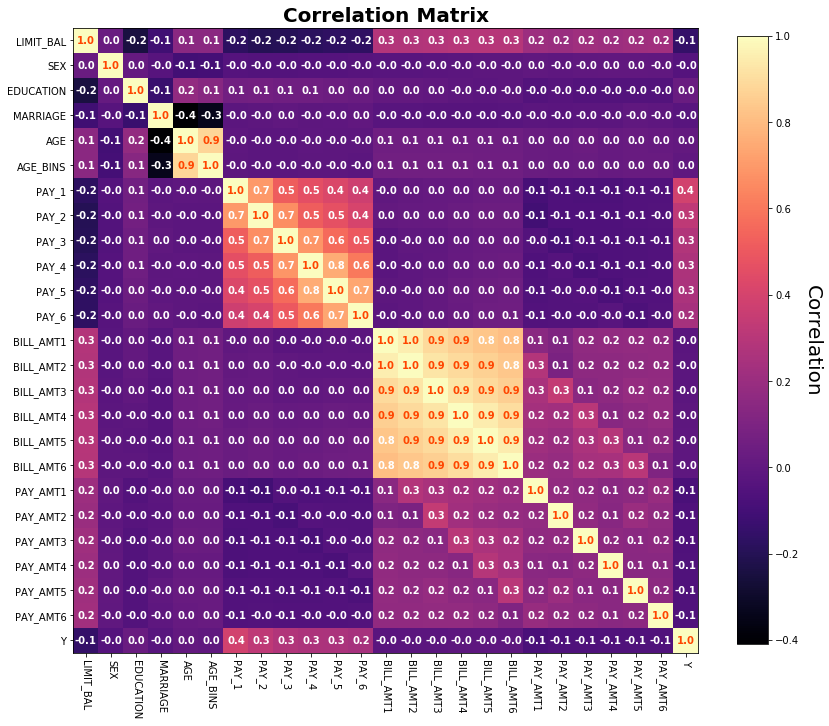

In [36]:
fig, ax = plt.subplots(figsize=(14,14))
im = ax.imshow(corr_array,cmap='magma')
cbar = ax.figure.colorbar(im, ax=ax,shrink=0.8)
cbar.ax.set_ylabel('Correlation', rotation=-90, va="bottom",fontsize=20)
data = im.get_array()
textcolors=['#FFFFFF','#FF4500']
for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, '%1.1f'%data[i, j], color=textcolors[data[i, j]>0.85],ha='center',va='center',fontweight='bold')
ax.set_title('Correlation Matrix',fontsize=20,fontweight='bold')
ax.set_xticks(np.arange(len(train_data.columns.tolist())))
ax.set_yticks(np.arange(len(train_data.columns)))
ax.set_xticklabels(train_data.columns,rotation=-90)
ax.set_yticklabels(train_data.columns)
fig.show()

Age bins,Education have considerable correlation with the credit limit. Marriage and age has a negative correlation. Payment history has decreasing 
PAY_x has a correlation with Y

# Methodology Overview

# Model training and validation

In [37]:
Y=train_data['Y']
X=train_data[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE' ,'AGE_BINS', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

In [38]:
scoring = ('accuracy','f1','roc_auc')

### Logistic Regression Classifier

In [39]:
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

from sklearn.model_selection import cross_validate

In [40]:
model_LR = LogisticRegression()
scores_LR = cross_validate(model_LR, X, Y, cv=10, scoring=scoring,return_train_score=True)

In [41]:
print(scores_LR['test_accuracy'].mean())  

0.776125


In [42]:
print(scores_LR['test_f1'].mean())

0.0


In [43]:
print(scores_LR['test_roc_auc'].mean())

0.6492424265141723


### k-NN Classifier

In [44]:
model_knn = KNeighborsClassifier(n_neighbors=5)

scores_knn = cross_validate(model_knn, X, Y, cv=10, scoring=scoring,return_train_score=True)

In [45]:
print(scores_knn['test_accuracy'].mean())  

0.7501249999999999


In [46]:
print(scores_knn['test_f1'].mean())

0.24049032511293192


In [47]:
print(scores_knn['test_roc_auc'].mean())

0.6054062698976741


### Support Vector Classifier

In [48]:
from sklearn.svm import SVC

In [49]:
model_svm = SVC()

scores = cross_validate(model_svm, X, Y, scoring=scoring,cv=10, return_train_score=True)

In [50]:
print(scores['test_accuracy'].mean())  

0.7761250000000002


In [51]:
print(scores['test_f1'].mean())

0.023253231129583905


In [52]:
print(scores['test_roc_auc'].mean())

0.5039752866514531


### Score Comparison

In [ ]:
index=np.arange(1,11)
fig,axs=plt.subplots(1,3,figsize=(22,6))

for ind,score in zip(np.arange(3),['accuracy','f1','roc_auc']):
    axs[ind].plot(index,scores_LR['test_%s'%(score)],label='Logistic Regression',marker='.')
    axs[ind].plot(index,scores_knn['test_%s'%(score)],label='k-NN Classifier',marker='.')
    axs[ind].plot(index,scores['test_%s'%(score)],label='Support Vector Classifier',marker='.')
    axs[ind].set_xticks(np.arange(1,11))
    axs[ind].legend(fontsize=12)
    axs[ind].set_xlabel('Folds',fontsize=12,fontweight='bold')
    axs[ind].set_ylabel('Accuracy',fontsize=12,fontweight='bold')
    axs[ind].set_title('Score Comparison: %s'%(score),fontsize=16,fontweight='bold')

'''axs[0].plot(index,scores_LR['test_accuracy'],label='Logistic Regression',marker='.')
axs[0].plot(index,scores_knn['test_accuracy'],label='k-NN Classifier',marker='.')
axs[0].plot(index,scores['test_accuracy'],label='Support Vector Classifier',marker='.')
axs[0].set_xticks(np.arange(1,11))
axs[0].legend(fontsize=12)
axs[0].set_xlabel('Folds',fontsize=12,fontweight='bold')
axs[0].set_ylabel('Accuracy',fontsize=12,fontweight='bold')
axs[0].set_title('Score Comparison: Accuracy',fontsize=16,fontweight='bold')

axs[1].plot(index,scores_LR['test_f1'],label='Logistic Regression',marker='.')
axs[1].plot(index,scores_knn['test_f1'],label='k-NN Classifier',marker='.')
axs[1].plot(index,scores['test_f1'],label='Support Vector Classifier',marker='.')
axs[1].set_xticks(np.arange(1,11))
axs[1].legend(fontsize=12)
axs[1].set_xlabel('Folds',fontsize=12,fontweight='bold')
axs[1].set_ylabel('F1-Score',fontsize=12,fontweight='bold')
axs[1].set_title('Score Comparison: F1-Score',fontsize=16,fontweight='bold')

axs[2].plot(index,scores_LR['test_roc_auc'],label='Logistic Regression',marker='.')
axs[2].plot(index,scores_knn['test_roc_auc'],label='k-NN Classifier',marker='.')
axs[2].plot(index,scores['test_roc_auc'],label='Support Vector Classifier',marker='.')
axs[2].set_xticks(np.arange(1,11))
axs[2].legend(fontsize=12)
axs[2].set_xlabel('Folds',fontsize=12,fontweight='bold')
axs[2].set_ylabel('ROC-AUC',fontsize=12,fontweight='bold')
axs[2].set_title('Score Comparison: ROC-AUC',fontsize=16,fontweight='bold')'''

plt.show()

### Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
model_svm = SVC()

scores = cross_validate(model_svm, X, Y, scoring=scoring,cv=10, return_train_score=True)

In [50]:
print(scores['test_accuracy'].mean())  

0.7761250000000002


In [51]:
print(scores['test_f1'].mean())

0.023253231129583905


In [52]:
print(scores['test_roc_auc'].mean())

0.5039752866514531


### Hyperparameter Tuning

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
nn_range=np.arange(10,60,10)
nn_range=np.append(nn_range,np.arange(61,101))

In [56]:
param_grid = dict(n_neighbors=nn_range, weights = ['uniform', 'distance'])

In [ ]:
grid = GridSearchCV(model_knn, param_grid, cv=10,n_jobs=4, scoring=scoring,refit='roc_auc', return_train_score=True)
grid.fit(X, Y)
print(grid.best_score_)
print(grid.best_params_)

In [ ]:
results=grid.cv_results_

In [ ]:
grid.cv_results_['mean_test_accuracy'].max()

In [ ]:
plt.figure(figsize=(13, 13))
plt.title("GridSearchCV Results",fontsize=16)

plt.xlabel("n_neighbours")
plt.ylabel("Score")

# Get the regular numpy array from the MaskedArray
index=np.arange(1, 100)

for scorer, color in zip(sorted(scoring), ['#1f77b4', '#ff7f0e','#2ca02c']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(index, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(index, sample_score_mean, style, color=color, label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([index[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (index[best_index], best_score + 0.005))

plt.legend()

plt.show()

# Results

# Final Predictions on test set

# References

[1] Yeh, I-Cheng, and Che-hui Lien. "The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients." Expert Systems with Applications 36.2 (2009): 2473-2480.

[2] Preda, G. (2018). Default of Credit Card Clients - Predictive Models. [online] Kaggle. Available at: https://www.kaggle.com/gpreda/default-of-credit-card-clients-predictive-models/notebook?scriptVersionId=5201547 [Accessed 6 Dec. 2018].

[3]